In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt

In [2]:
from statsmodels.tsa.arima.model import ARIMA
from jh_utils.data.sql.object import create_object_DB_by_envfile

In [7]:
from statsmodels.tsa import stattools as st
from statsmodels.graphics import tsaplots as tsaplots

In [10]:
db_ob = create_object_DB_by_envfile('../../api/.env')

In [12]:
query = "select * from collected where station='A612'"
df = pd.read_sql_query(query, db_ob.engine())

In [13]:
df

,data,hora,"temperatura do ar - bulbo seco, horaria (°c)",temperatura maxima na hora ant. (aut) (°c),temperatura minima na hora ant. (aut) (°c),"umidade relativa do ar, horaria (%)",umidade rel. max. na hora ant. (aut) (%),umidade rel. min. na hora ant. (aut) (%),temperatura do ponto de orvalho (°c),temperatura orvalho max. na hora ant. (aut) (°c),temperatura orvalho min. na hora ant. (aut) (°c),"pressao atmosferica ao nivel da estacao, horaria (mb)",pressao atmosferica max. na hora ant. (aut) (mb),pressao atmosferica min. na hora ant. (aut) (mb),vento direcao horaria (gr) (° (gr)),vento rajada maxima (m/s),vento velocidade horaria (m/s),radiacao global (kj/m2),"precipitacao total, horario (mm)",station
0,15/01/2024,00:00,26.6,26.7,26.5,75.0,76.0,74.0,21.7,21.9,21.7,1014.9,1014.9,1014.4,1.8,353.0,6.3,NaN,0.0,A612
1,15/01/2024,01:00,26.8,27.0,26.6,73.0,75.0,72.0,21.5,21.8,21.4,1015.2,1015.2,1014.9,1.7,353.0,6.1,NaN,0.0,A612
2,15/01/2024,02:00,26.5,26.8,26.5,74.0,75.0,73.0,21.6,21.8,21.4,1015.0,1015.2,1015.0,1.8,344.0,6.6,NaN,0.0,A612
3,15/01/2024,03:00,26.8,26.9,26.4,72.0,75.0,72.0,21.3,21.6,21.3,1015.1,1015.1,1014.9,1.3,350.0,5.6,NaN,0.0,A612
4,15/01/2024,04:00,26.3,26.9,26.2,73.0,74.0,71.0,21.0,21.4,21.0,1015.0,1015.2,1015.0,1.2,340.0,5.3,NaN,0.0,A612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,02/02/2024,18:00,30.2,30.7,30.0,58.0,59.0,56.0,21.1,21.4,20.6,1016.0,1016.1,1015.9,2.3,92.0,5.7,1638.0,0.0,A612
744,02/02/2024,19:00,29.4,30.6,29.4,60.0,61.0,57.0,21.0,21.6,20.9,1015.7,1016.0,1015.7,2.6,116.0,5.1,1582.6,0.0,A612
745,02/02/2024,20:00,27.9,29.4,27.9,72.0,72.0,60.0,22.4,22.4,21.0,1015.9,1015.9,1015.7,2.2,120.0,5.8,636.2,0.0,A612
746,02/02/2024,21:00,27.4,28.1,27.4,75.0,75.0,72.0,22.6,22.8,22.4,1016.3,1016.3,1015.9,1.4,136.0,4.6,226.1,0.0,A612


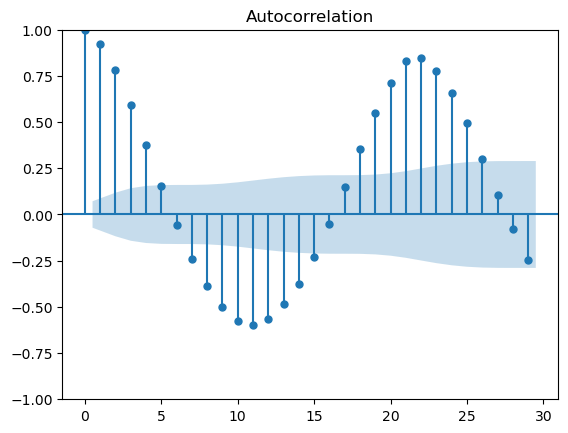

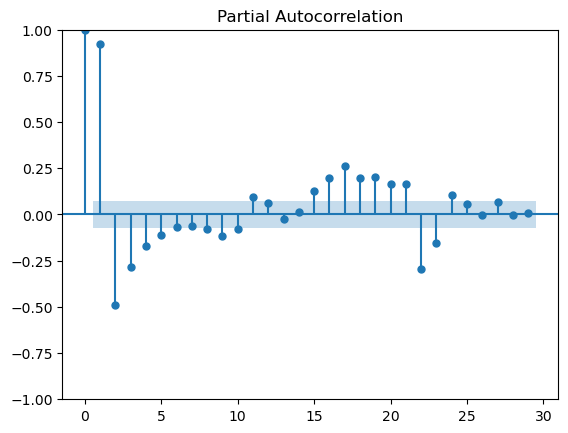

In [17]:
_ = tsaplots.plot_acf(df['temperatura maxima na hora ant. (aut) (°c)'])
_ = tsaplots.plot_pacf(df['temperatura maxima na hora ant. (aut) (°c)'])

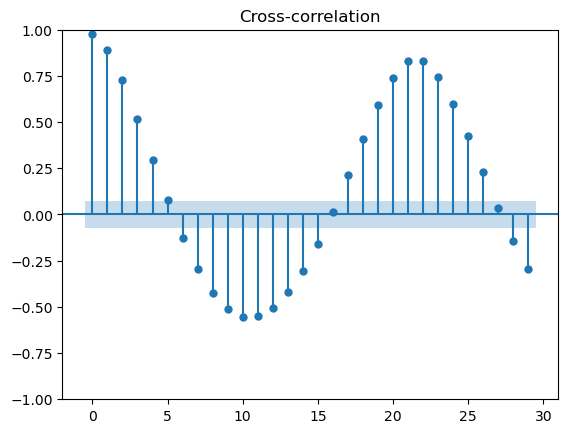

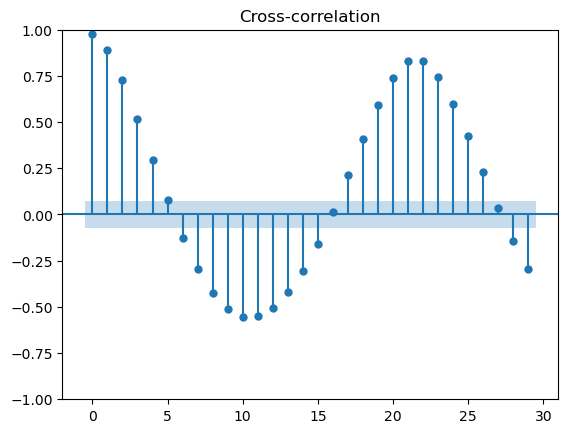

In [19]:
tsaplots.plot_ccf(df['temperatura maxima na hora ant. (aut) (°c)'],df[''])

In [40]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split

def train_arima_model(series, order):
    model = ARIMA(series, order=order)
    model_fit = model.fit(disp=0)
    return model_fit

def make_forecast(model_fit, steps):
    forecast = model_fit.forecast(steps=steps)
    return forecast
    
def plot_and_evaluate_forecast(forecast, actual):
    plt.figure(figsize=(12, 6))
    plt.plot(forecast, color='red', label='Previsão')
    plt.plot(actual, color='blue', label='Real')
    plt.legend()
    plt.show()

    mse = mean_squared_error(actual, forecast)
    print(f'MSE: {mse}')

def train_arima_model(series, order):
    model = ARIMA(series, order=order)
    model_fit = model.fit()
    return model_fit

In [51]:
def forecast_in_steps(model_fit, x_test, initial_steps=2, total_steps=15):
    forecast = []
    for i in range(0, total_steps, initial_steps):
        next_forecast = model_fit.forecast(steps=initial_steps)
        forecast.extend(next_forecast)
        model_fit = train_arima_model(x_test[:i+initial_steps], order=(2,0,0))
    return forecast

In [63]:
test2 = x_test[:16].reset_index().iloc[:,1]

0     25.2
1     25.0
2     25.0
3     25.5
4     25.5
5     25.1
6     25.3
7     26.2
8     27.1
9     29.1
10    30.9
11    31.9
12    31.9
13    31.4
14    30.4
15    30.7
Name: temperatura do ar - bulbo seco, horaria (°c), dtype: float64

/home/joaoholz/miniconda3/envs/weather-modeling/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/joaoholz/miniconda3/envs/weather-modeling/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/joaoholz/miniconda3/envs/weather-modeling/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/joaoholz/miniconda3/envs/weather-modeling/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few obs

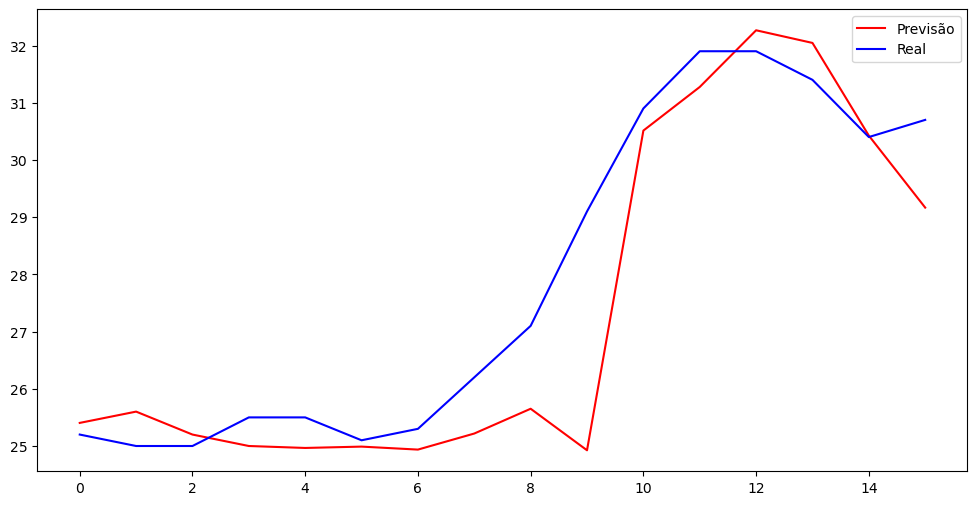

MSE: 1.565975266210637


In [65]:
x_train, x_test = train_test_split(x, test_size=0.2, shuffle=False)
model_fit = train_arima_model(x_train, order=(2,0,0))
forecast = forecast_in_steps(model_fit, x_test, initial_steps=2, total_steps=15)
plot_and_evaluate_forecast(forecast, test2)